In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset=pd.read_csv('housing_train.csv')
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
dataset.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
dataset.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [4]:
dataset.shape

(1168, 81)

In [5]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


Since they are many missing values, we need to find the relationship between missing values and Sales Price

# EDA

In [70]:
dataset.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id              1.000000    0.004259  0.019999    -0.020278 -0.025426   
MSSubClass      0.004259    1.000000 -0.175138    -0.460005 -0.434493   
MSZoning        0.019999   -0.175138  1.000000     0.278796  0.287792   
LotFrontage    -0.020278   -0.460005  0.278796     1.000000  0.648901   
LotArea        -0.025426   -0.434493  0.287792     0.648901  1.000000   
...                  ...         ...       ...          ...       ...   
SaleCondition  -0.012029   -0.032775  0.135809     0.084132  0.058951   
SalePrice      -0.025061   -0.045982  0.396243     0.333908  0.380781   
LotFrontagenan  0.011587   -0.023405  0.087920     0.053058  0.137389   
MasVnrAreanan   0.021921   -0.009890  0.069470     0.009808  0.021073   
GarageYrBltnan -0.007594    0.089455 -0.128050    -0.123446 -0.143532   

                  Street     Alley  LotShape  LandContour  Utilities  ...  \
Id              0.003613  0.008284 -0.011359     0.013677        NaN  ...   
MSSubClass     -0.035981 -0.141808 -0.098102    -0.013532        NaN  ...   
MSZoning        0.092054  0.250815  0.205139     0.020019        NaN  ...   
LotFrontage    -0.035739  0.155400  0.181225     0.030699        NaN  ...   
LotArea        -0.110007  0.127556  0.348626     0.106523        NaN  ...   
...                  ...       ...       ...          ...        ...  ...   
SaleCondition   0.005173  0.065956  0.060477     0.053718        NaN  ...   
SalePrice       0.068399  0.149291  0.285422     0.118178        NaN  ...   
LotFrontagenan -0.010120  0.075118  0.308041     0.015837        NaN  ...   
MasVnrAreanan   0.004552 -0.008094 -0.016091    -0.009299        NaN  ...   
GarageYrBltnan -0.050282 -0.061259 -0.091284    -0.020613        NaN  ...   

                MiscFeature   MiscVal    MoSold    YrSold  SaleType  \
Id                 0.030148  0.001304  0.023479 -0.008853  0.006299   
MSSubClass         0.046748 -0.023503 -0.016015 -0.038595 -0.009495   
MSZoning           0.035574  0.010513  0.012268  0.009155  0.127517   
LotFrontage       -0.014418  0.008418  0.032464 -0.006966  0.082128   
LotArea           -0.057236  0.057981  0.025986 -0.039069  0.041587   
...                     ...       ...       ...       ...       ...   
SaleCondition      0.019143  0.011010  0.003354  0.028663  0.456550   
SalePrice          0.076508 -0.005976  0.087390 -0.048638  0.266284   
LotFrontagenan    -0.027766  0.088052 -0.003836  0.016275 -0.089550   
MasVnrAreanan      0.012489 -0.006766  0.014833 -0.005287  0.066933   
GarageYrBltnan    -0.000538 -0.015090 -0.056080  0.007057 -0.032666   

                SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
Id                  -0.012029  -0.025061        0.011587       0.021921   
MSSubClass          -0.032775  -0.045982       -0.023405      -0.009890   
MSZoning             0.135809   0.396243        0.087920       0.069470   
LotFrontage          0.084132   0.333908        0.053058       0.009808   
LotArea              0.058951   0.380781        0.137389       0.021073   
...                       ...        ...             ...            ...   
SaleCondition        1.000000   0.282130       -0.020944       0.039246   
SalePrice            0.282130   1.000000        0.029347       0.063521   
LotFrontagenan      -0.020944   0.029347        1.000000       0.020573   
MasVnrAreanan        0.039246   0.063521        0.020573       1.000000   
GarageYrBltnan      -0.167161  -0.333601       -0.055685      -0.018696   

                GarageYrBltnan  
Id                   -0.007594  
MSSubClass            0.089455  
MSZoning             -0.128050  
LotFrontage          -0.123446  
LotArea              -0.143532  
...                        ...  
SaleCondition        -0.167161  
SalePrice            -0.333601  
LotFrontagenan       -0.055685  
MasVnrAreanan        -0.018696  
GarageYrBltnan        1.000000  

[84 rows x 84 columns]

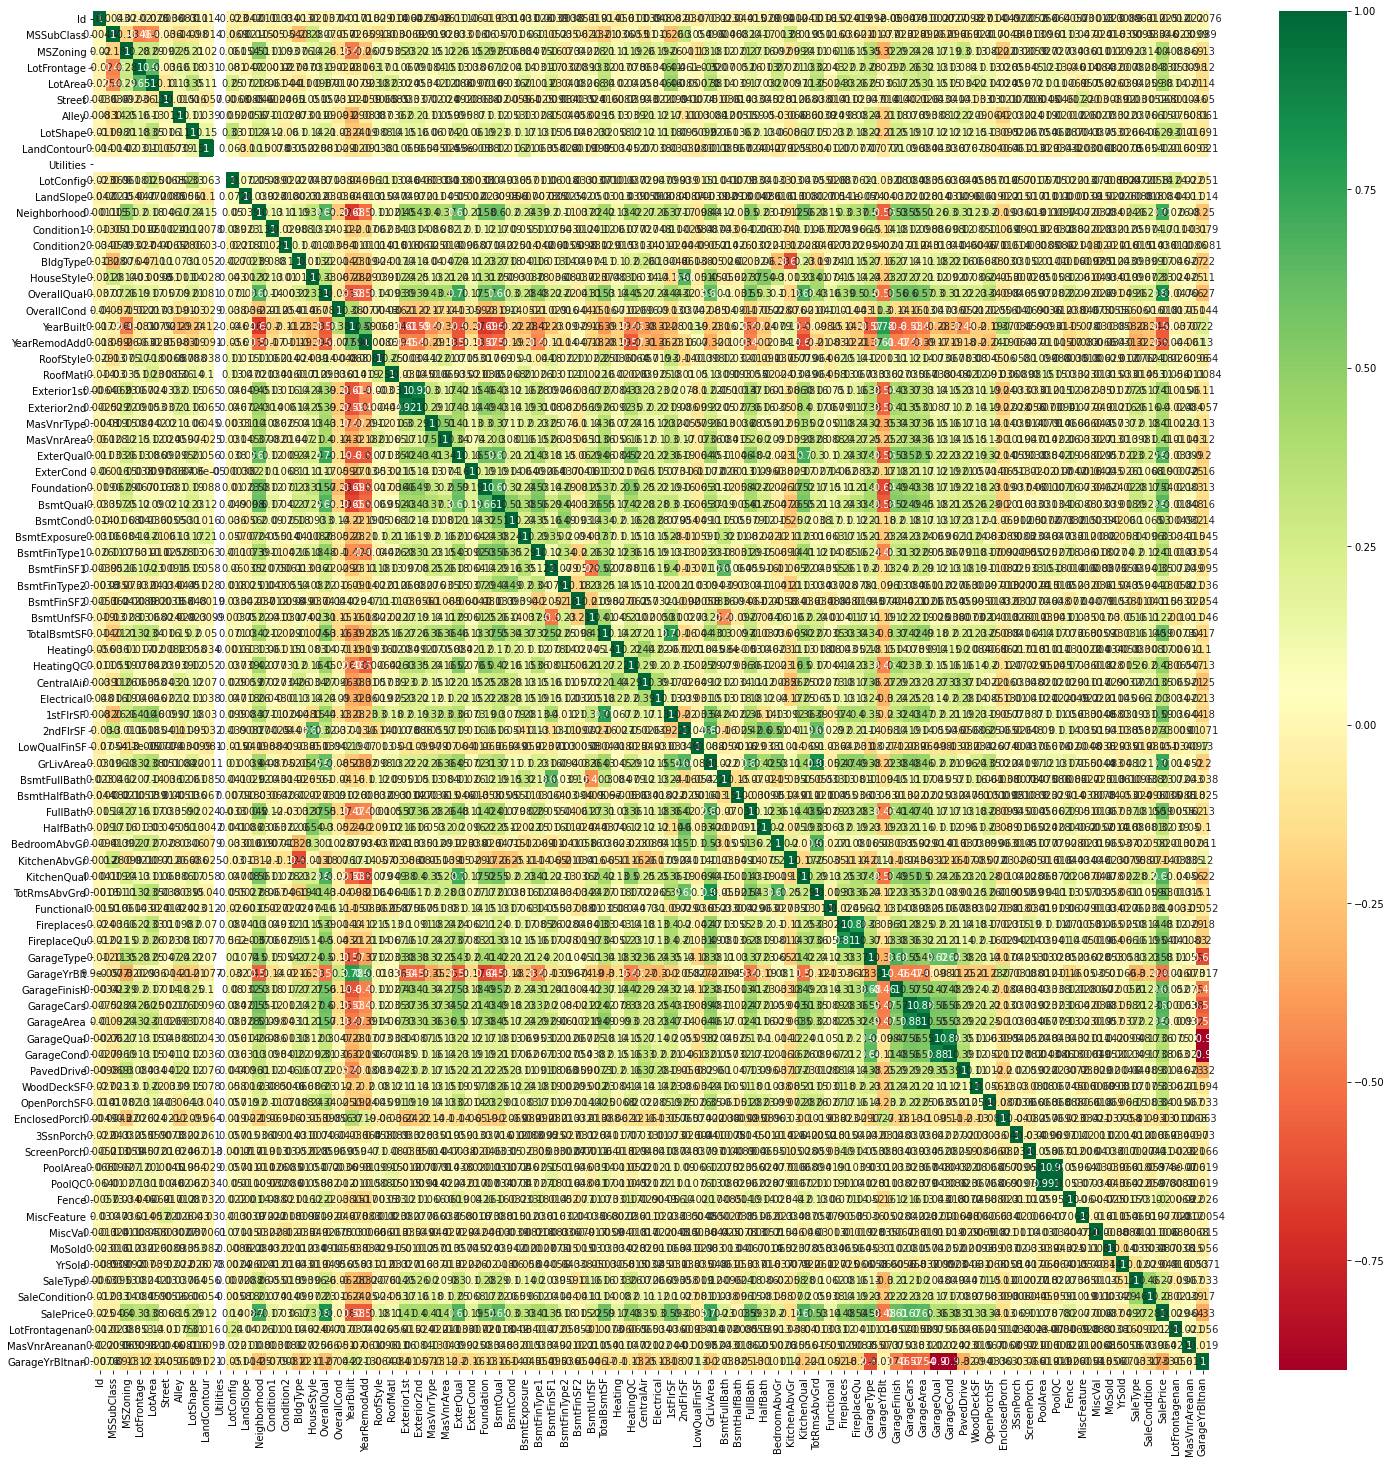

In [72]:
plt.figure(figsize = (25,25))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

plt.show()

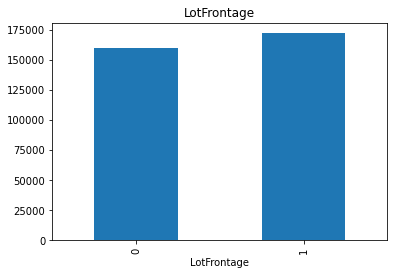

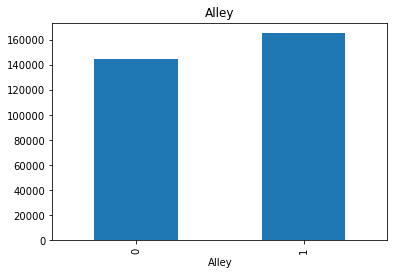

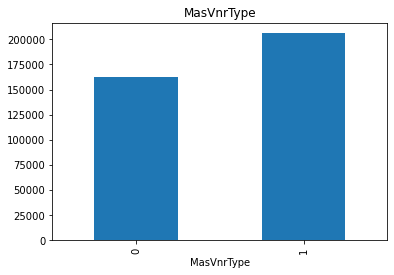

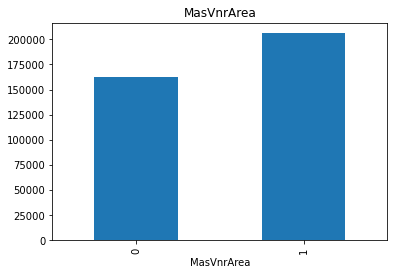

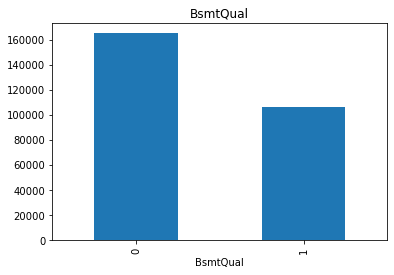

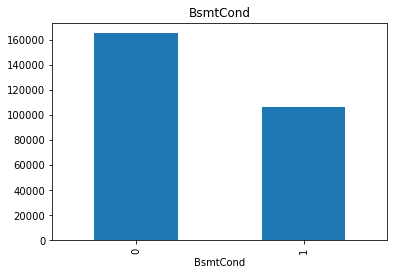

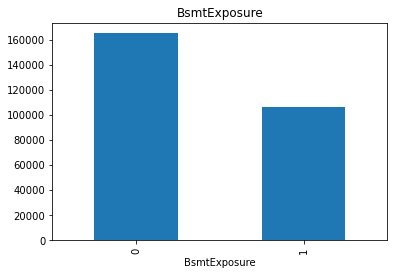

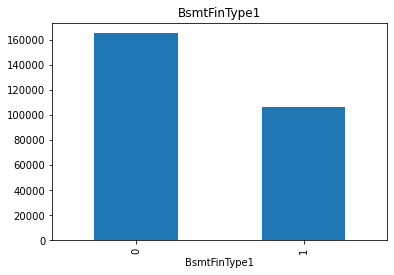

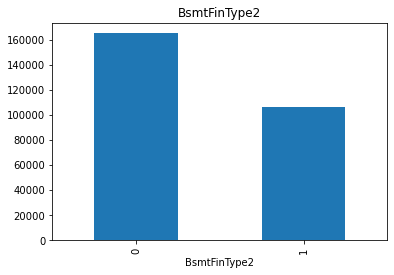

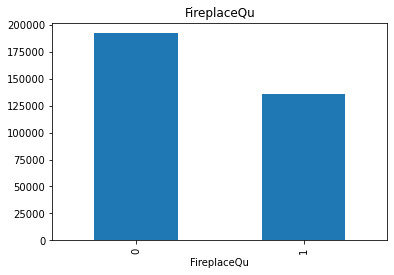

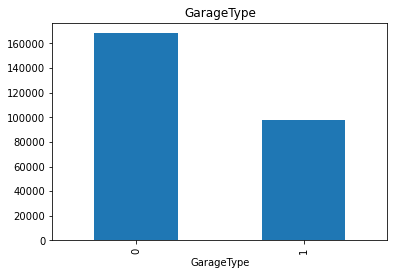

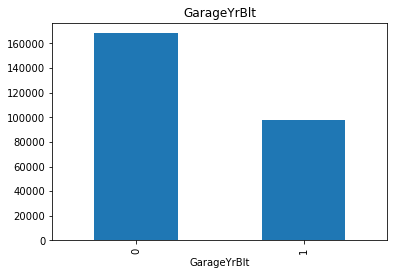

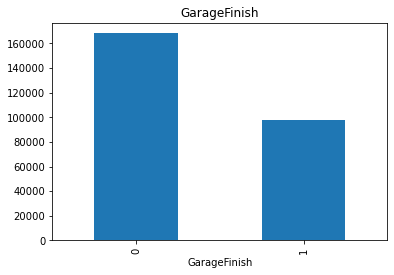

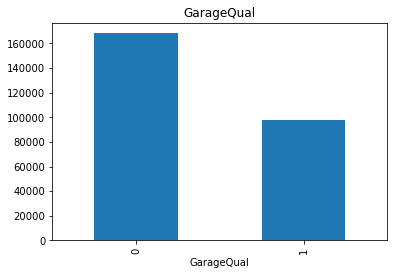

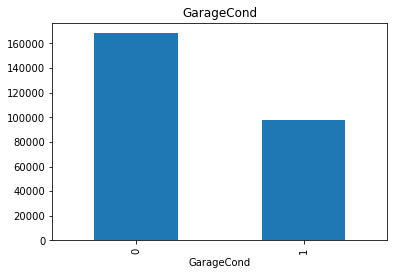

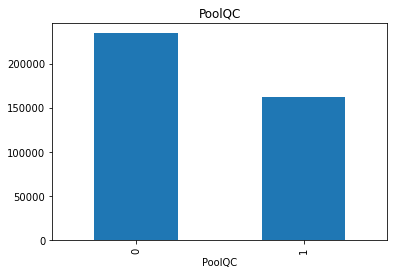

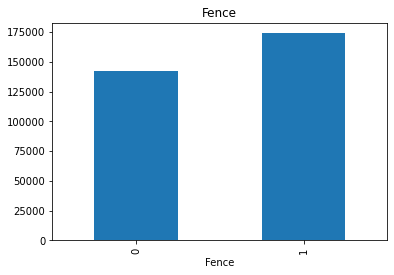

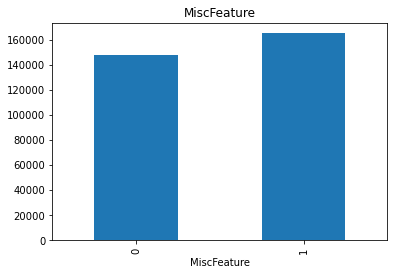

In [6]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [11]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

In [12]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

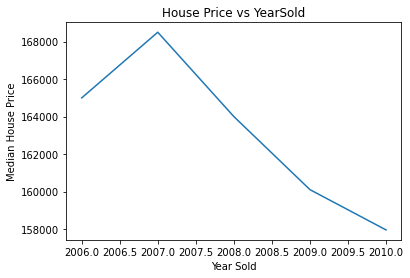

In [13]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [14]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

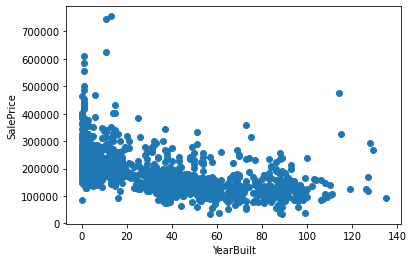

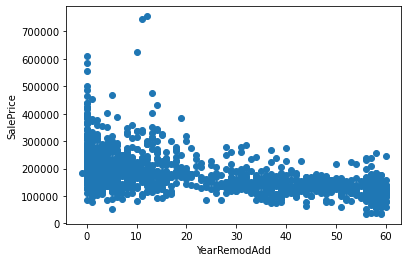

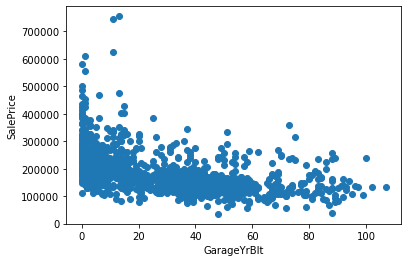

In [15]:
for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [16]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [17]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

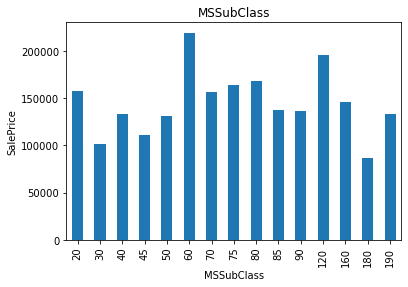

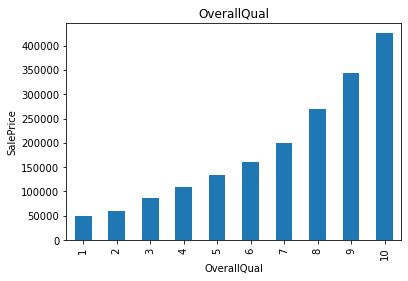

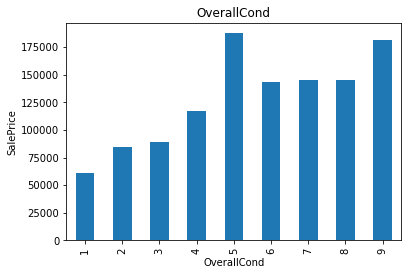

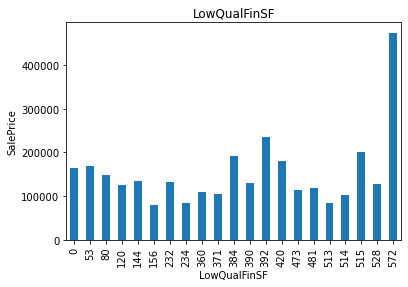

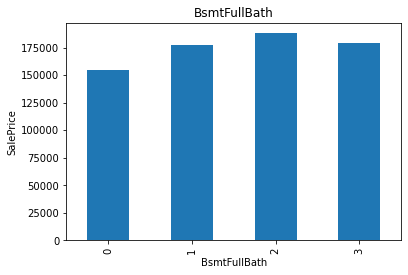

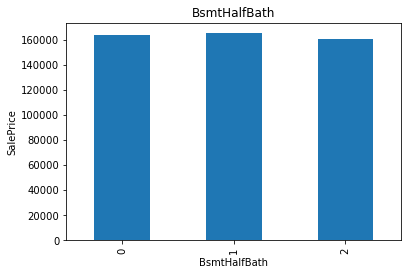

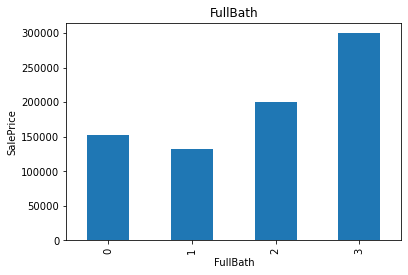

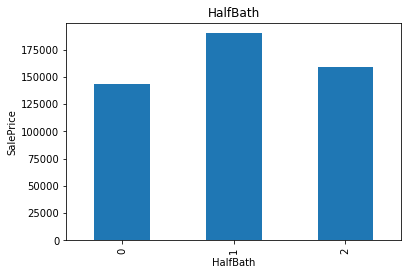

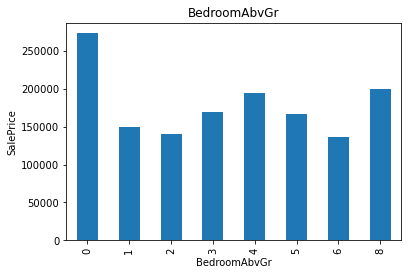

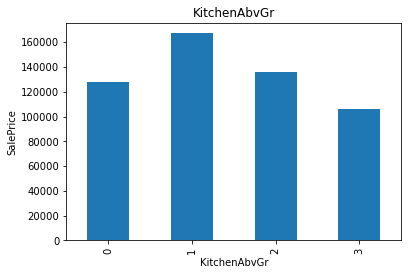

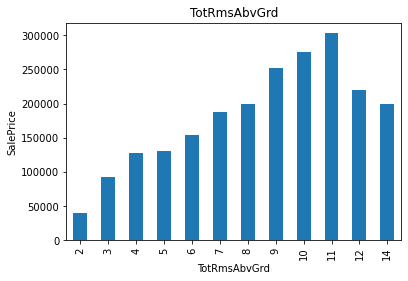

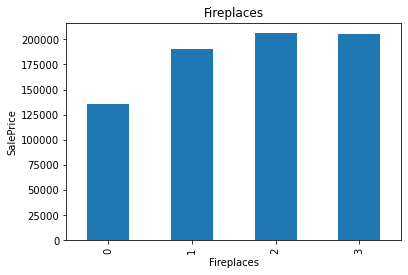

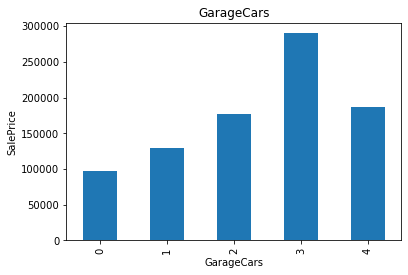

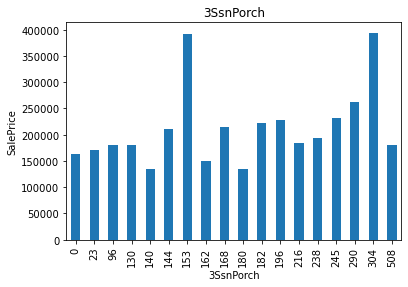

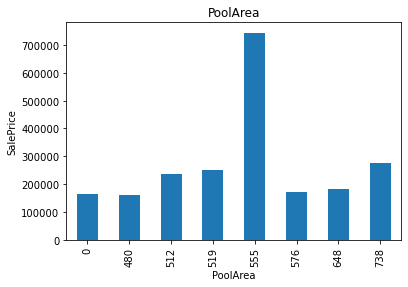

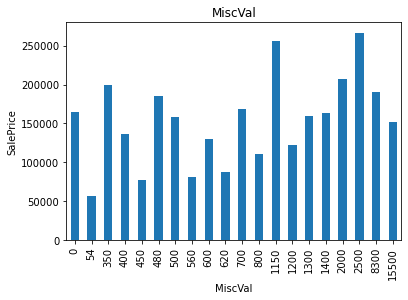

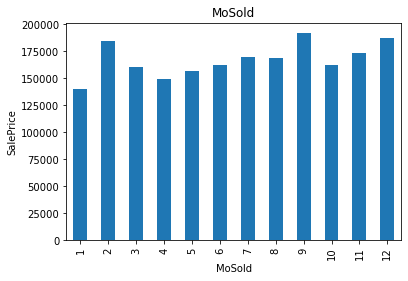

In [18]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


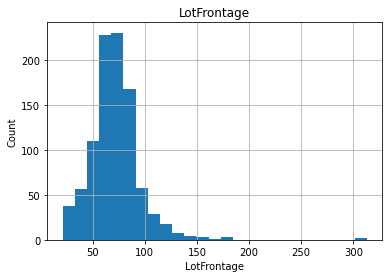

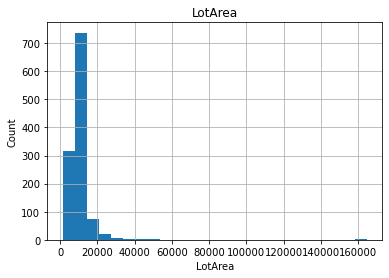

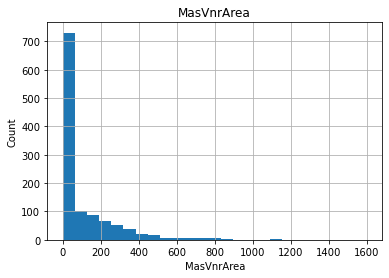

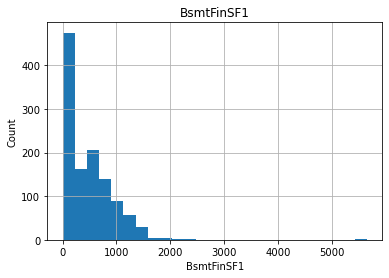

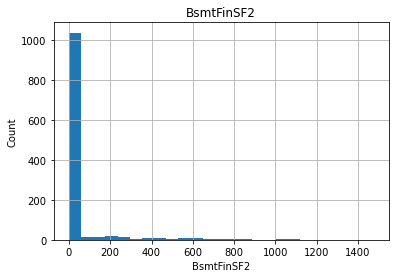

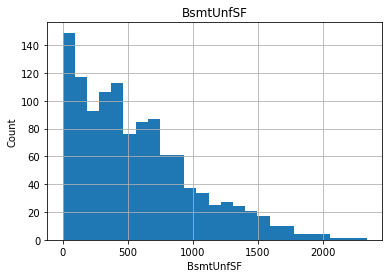

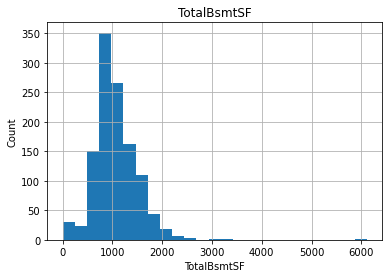

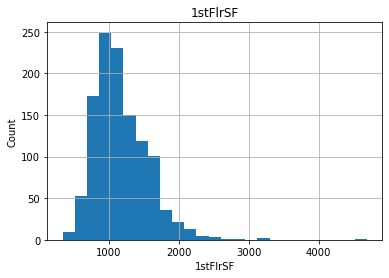

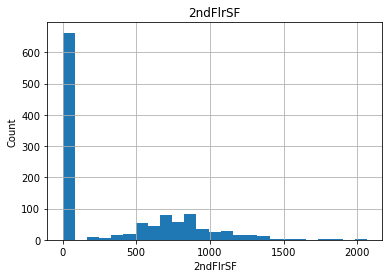

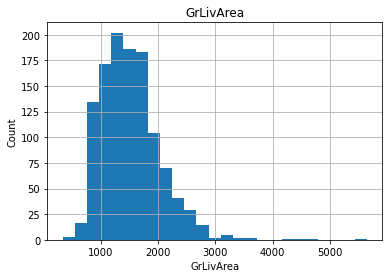

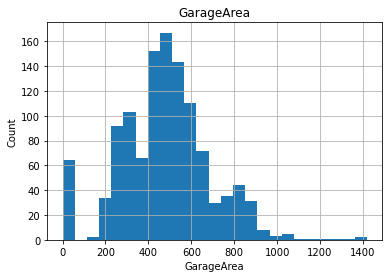

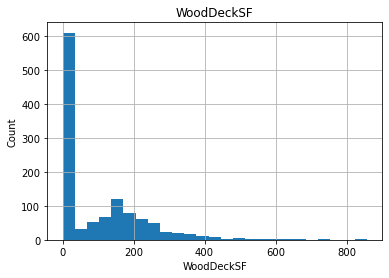

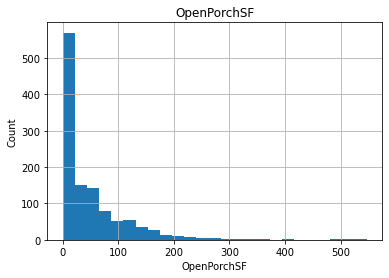

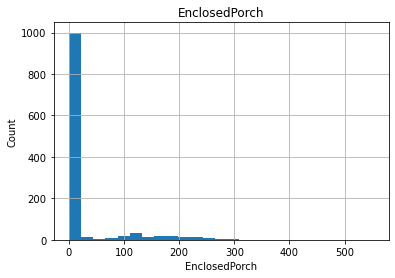

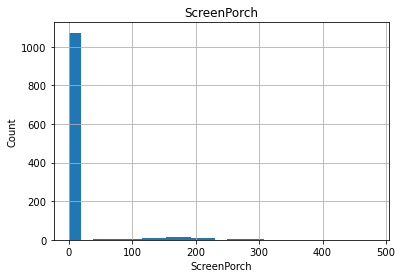

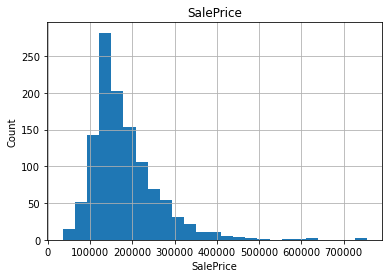

In [20]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

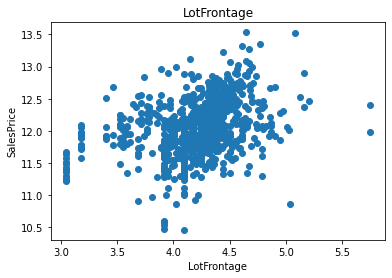

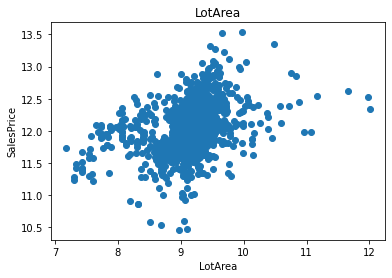

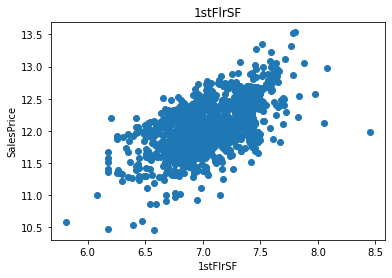

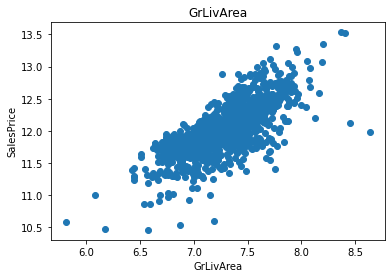

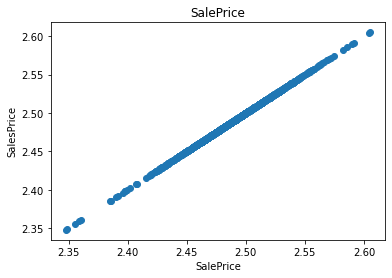

In [21]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

# Outliers

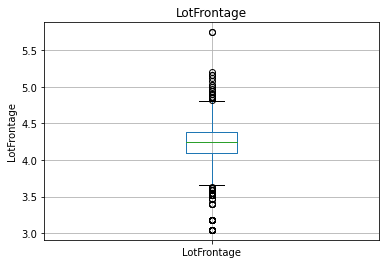

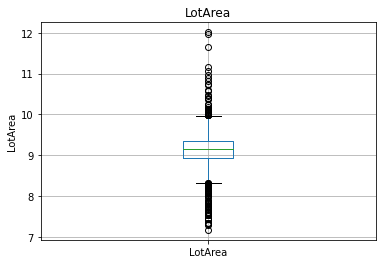

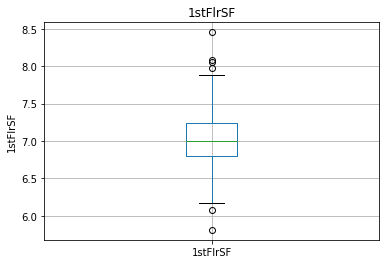

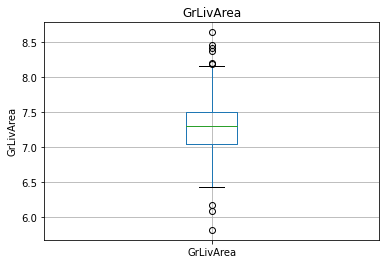

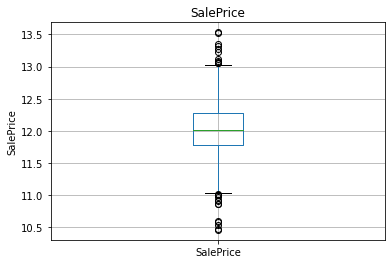

In [22]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [23]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

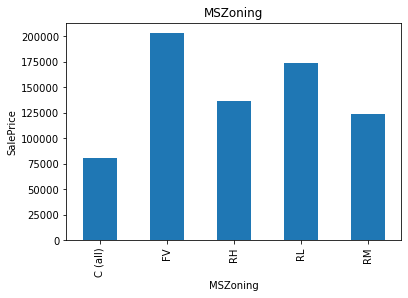

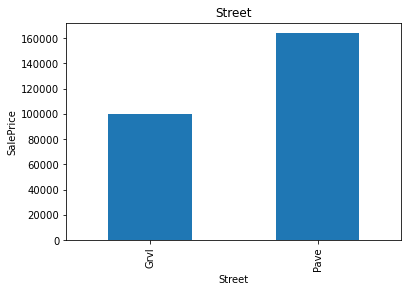

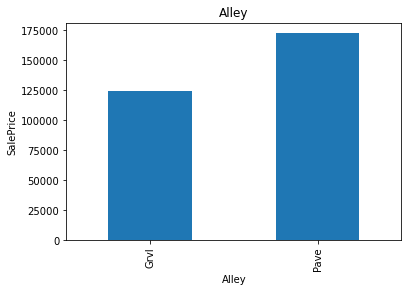

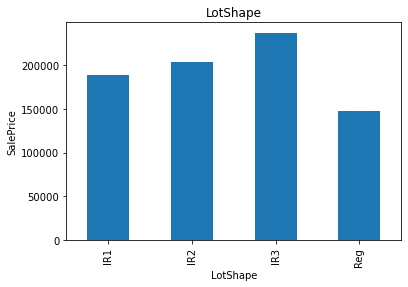

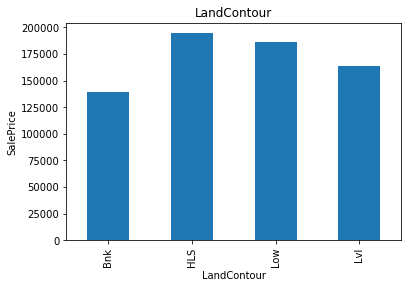

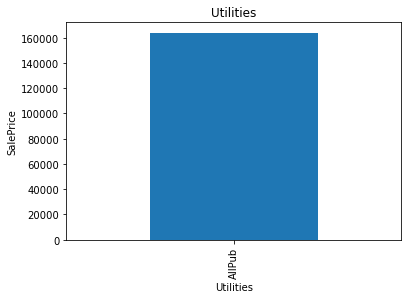

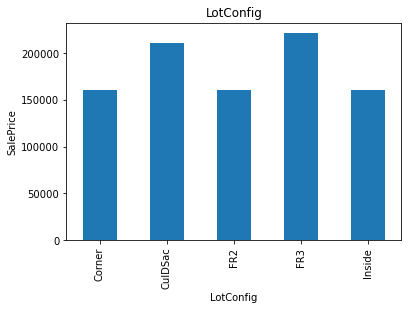

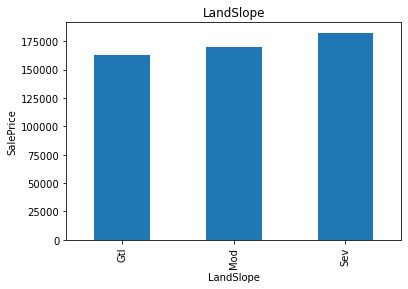

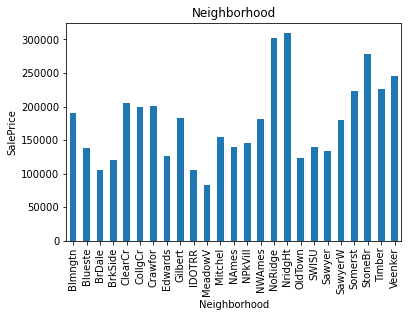

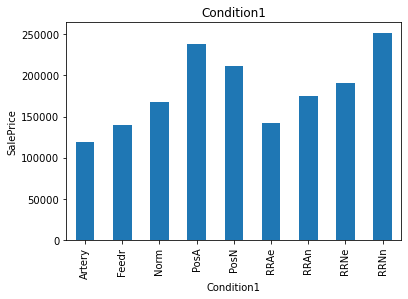

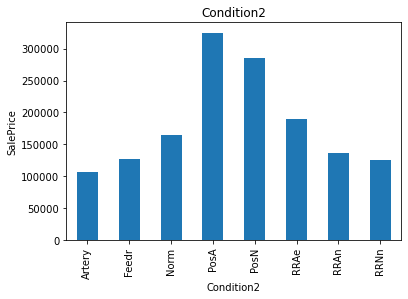

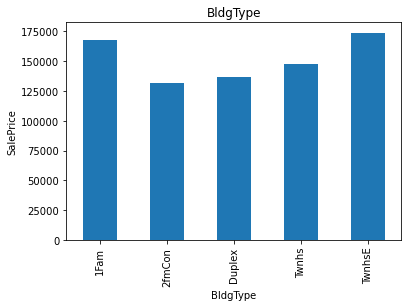

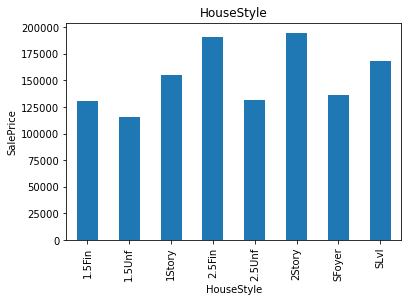

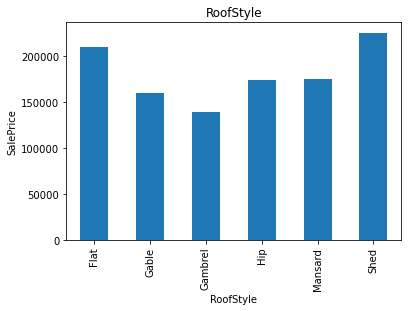

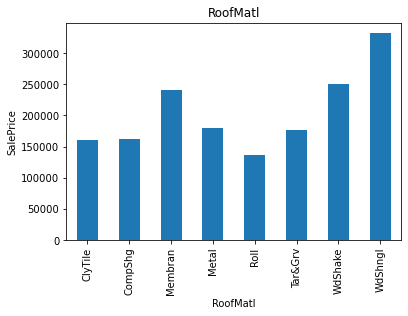

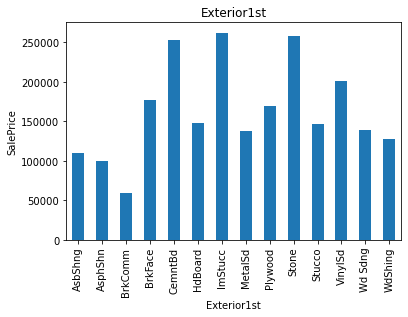

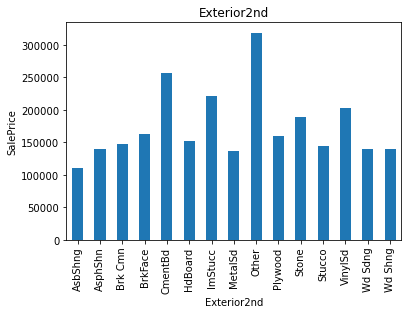

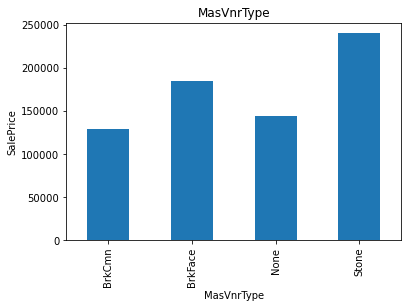

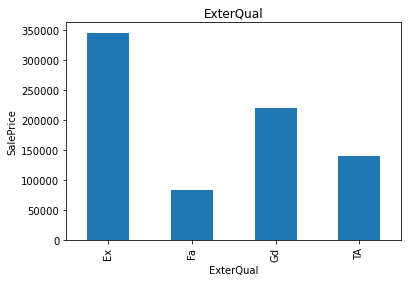

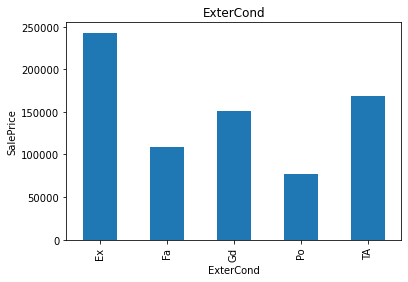

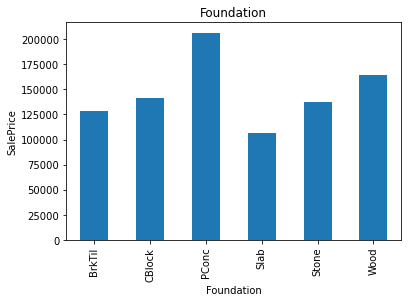

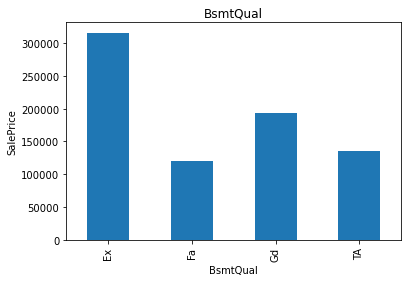

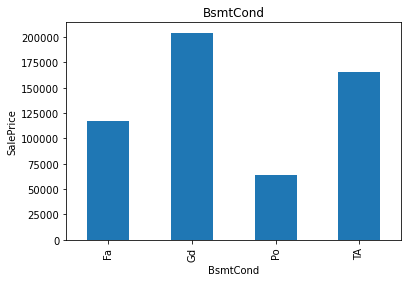

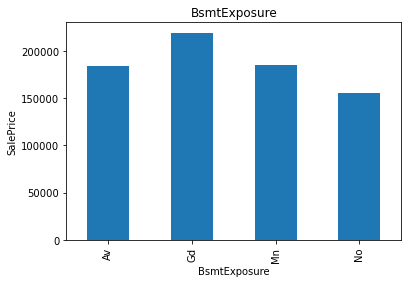

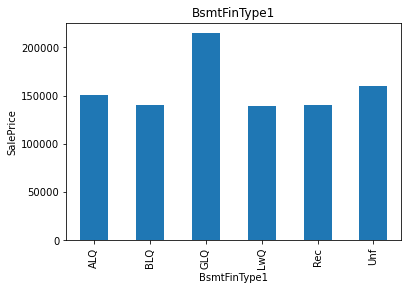

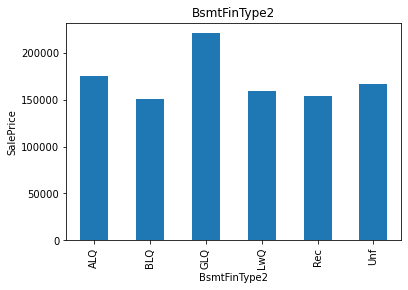

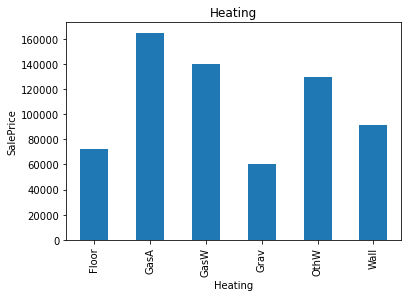

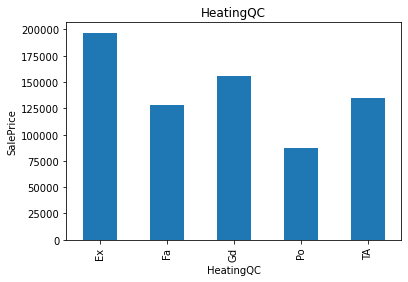

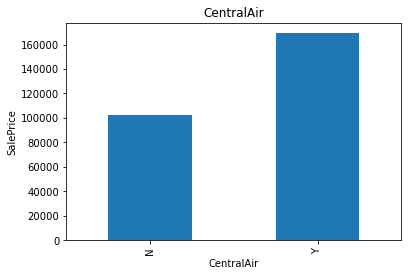

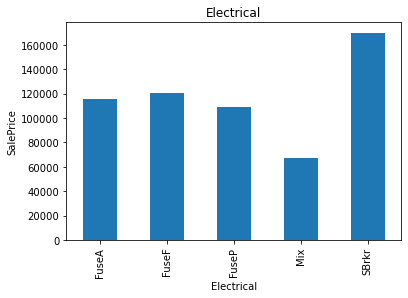

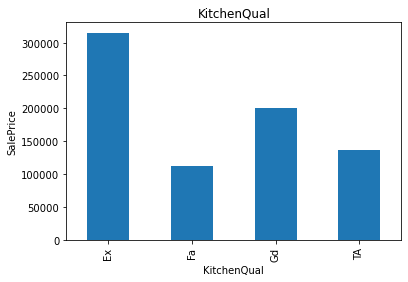

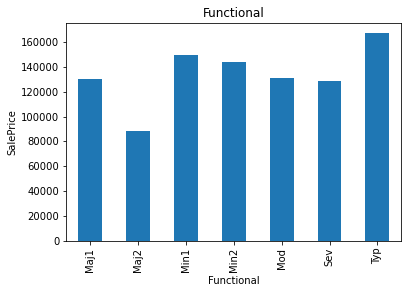

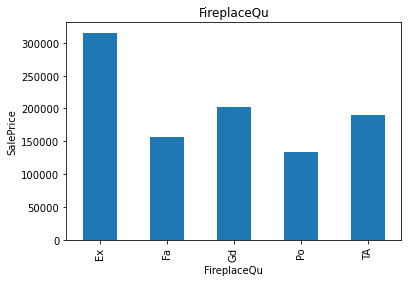

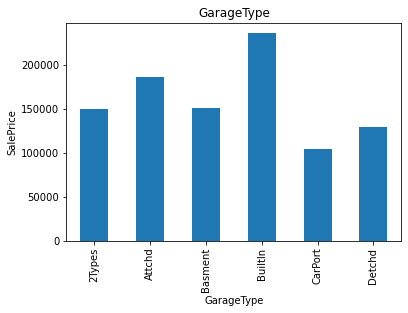

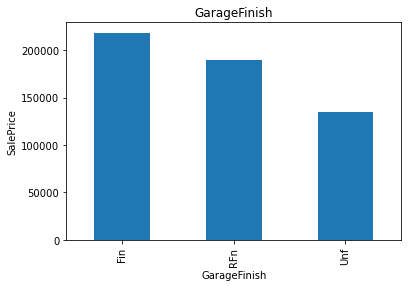

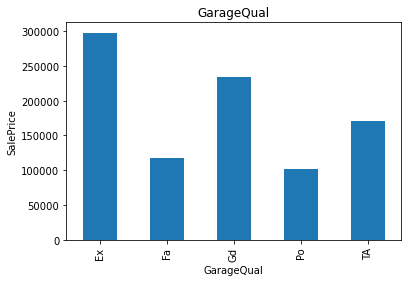

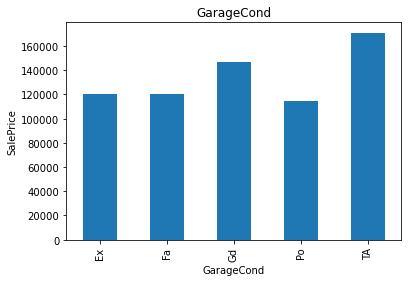

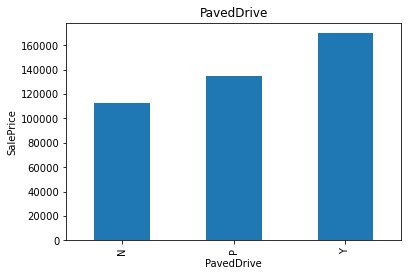

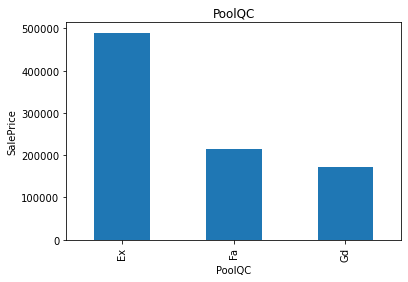

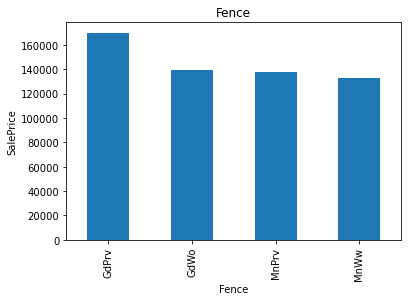

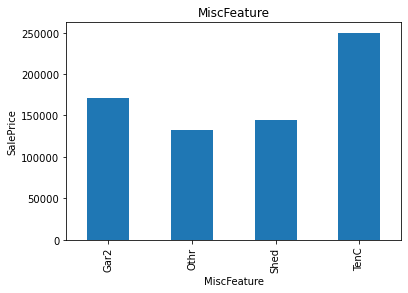

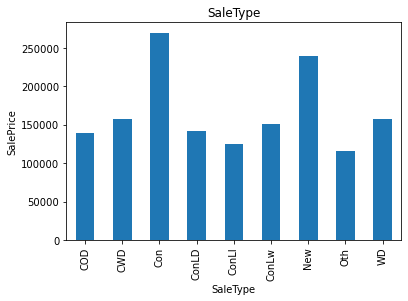

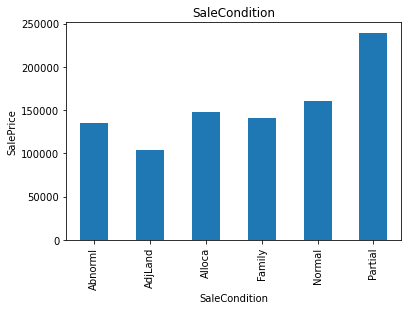

In [24]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

Handle the missing values

In [6]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [7]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [8]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1832% missing value
MasVnrArea: 0.006% missing value
GarageYrBlt: 0.0548% missing value


In [9]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [10]:
dataset.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  127         120       RL         70.0     4928   Pave  Missing      IR1   
1  889          20       RL         95.0    15865   Pave  Missing      IR1   
2  793          60       RL         92.0     9920   Pave  Missing      IR1   
3  110          20       RL        105.0    11751   Pave  Missing      IR1   
4  422          20       RL         70.0    16635   Pave  Missing      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...     Missing       0      2   2007       WD   
1         Lvl    AllPub  ...     Missing       0     10   2007       WD   
2         Lvl    AllPub  ...     Missing       0      6   2007       WD   
3         Lvl    AllPub  ...     Missing       0      1   2010      COD   
4         Lvl    AllPub  ...     Missing       0      6   2009       WD   

  SaleCondition SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0        Normal    128000               1              0               0  
1        Normal    268000               0              0               0  
2        Normal    269790               0              0               0  
3        Normal    190000               0              0               0  
4        Normal    215000               1              0               0  

[5 rows x 84 columns]

In [11]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [12]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         31            31         30.0
1         37            37         37.0
2         11            10         10.0
3         33            33         33.0
4         32             9         32.0

# Test data

In [13]:
df=pd.read_csv('housing_test.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [14]:
df.shape

(292, 80)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [16]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9521% missing values
BsmtQual: 0.024% missing values
BsmtCond: 0.024% missing values
BsmtExposure: 0.024% missing values
BsmtFinType1: 0.024% missing values
BsmtFinType2: 0.024% missing values
FireplaceQu: 0.476% missing values
GarageType: 0.0582% missing values
GarageFinish: 0.0582% missing values
GarageQual: 0.0582% missing values
GarageCond: 0.0582% missing values
Fence: 0.8493% missing values
MiscFeature: 0.9658% missing values


In [17]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
dtype: int64

In [18]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1541% missing value
GarageYrBlt: 0.0582% missing value
PoolQC: 1.0% missing value


In [19]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage      0
GarageYrBlt      0
PoolQC         292
dtype: int64

In [20]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [21]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0  127         120       RL     4.248495  8.502689   Pave  Missing      IR1   
1  889          20       RL     4.553877  9.671871   Pave  Missing      IR1   
2  793          60       RL     4.521789  9.202308   Pave  Missing      IR1   
3  110          20       RL     4.653960  9.371694   Pave  Missing      IR1   
4  422          20       RL     4.248495  9.719264   Pave  Missing      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...     Missing       0      2   2007       WD   
1         Lvl    AllPub  ...     Missing       0     10   2007       WD   
2         Lvl    AllPub  ...     Missing       0      6   2007       WD   
3         Lvl    AllPub  ...     Missing       0      1   2010      COD   
4         Lvl    AllPub  ...     Missing       0      6   2009       WD   

  SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0        Normal  11.759786               1              0               0  
1        Normal  12.498742               0              0               0  
2        Normal  12.505399               0              0               0  
3        Normal  12.154779               0              0               0  
4        Normal  12.278393               1              0               0  

[5 rows x 84 columns]

In [22]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [23]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [25]:
dataset.head(5)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0  127         120       RL     4.248495  8.502689   Pave  Missing      IR1   
1  889          20       RL     4.553877  9.671871   Pave  Missing      IR1   
2  793          60       RL     4.521789  9.202308   Pave  Missing      IR1   
3  110          20       RL     4.653960  9.371694   Pave  Missing      IR1   
4  422          20       RL     4.248495  9.719264   Pave  Missing      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...     Missing       0      2   2007       WD   
1         Lvl    AllPub  ...     Missing       0     10   2007       WD   
2         Lvl    AllPub  ...     Missing       0      6   2007       WD   
3         Lvl    AllPub  ...     Missing       0      1   2010      COD   
4         Lvl    AllPub  ...     Missing       0      6   2009       WD   

  SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0        Normal  11.759786               1              0               0  
1        Normal  12.498742               0              0               0  
2        Normal  12.505399               0              0               0  
3        Normal  12.154779               0              0               0  
4        Normal  12.278393               1              0               0  

[5 rows x 84 columns]

In [26]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [27]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [28]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [29]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [30]:
scaler.transform(dataset[feature_scale])

array([[0.58823529, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.55867239, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.54679523, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82352941, 0.75      , 0.0494253 , ..., 0.        , 0.        ,
        0.        ],
       [0.29411765, 0.        , 0.32109662, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ]])

In [31]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [32]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  127  11.759786    0.588235      0.75     0.445638  0.275238     1.0    1.0   
1  889  12.498742    0.000000      0.75     0.558672  0.516729     1.0    1.0   
2  793  12.505399    0.235294      0.75     0.546795  0.419742     1.0    1.0   
3  110  12.154779    0.000000      0.75     0.595717  0.454728     1.0    1.0   
4  422  12.278393    0.000000      0.75     0.445638  0.526518     1.0    1.0   

   LotShape  LandContour  ...  Fence  MiscFeature  MiscVal    MoSold  YrSold  \
0  0.333333     0.333333  ...   0.75          0.5      0.0  0.090909    0.25   
1  0.333333     0.333333  ...   0.75          0.5      0.0  0.818182    0.25   
2  0.333333     0.333333  ...   0.75          0.5      0.0  0.454545    0.25   
3  0.333333     0.333333  ...   0.50          0.5      0.0  0.000000    1.00   
4  0.333333     0.333333  ...   0.75          0.5      0.0  0.454545    0.75   

   SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0  0.666667            0.8             1.0            0.0             0.0  
1  0.666667            0.8             0.0            0.0             0.0  
2  0.666667            0.8             0.0            0.0             0.0  
3  0.000000            0.8             0.0            0.0             0.0  
4  0.666667            0.8             1.0            0.0             0.0  

[5 rows x 84 columns]

In [33]:
df.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [34]:
df.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

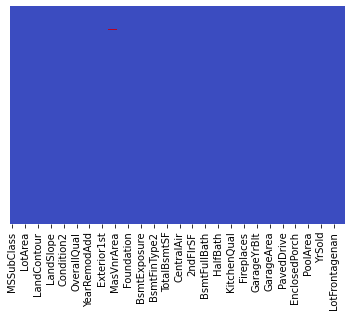

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [36]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

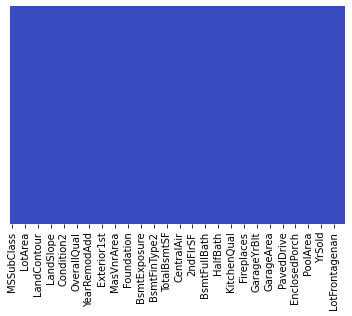

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

There is no missing value in this dataset

In [38]:
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL         86.0    14157   Pave      IR1         HLS   
1         120       RL         65.0     5814   Pave      IR1         Lvl   
2          20       RL         65.0    11838   Pave      Reg         Lvl   
3          70       RL         75.0    12000   Pave      Reg         Bnk   
4          60       RL         86.0    14598   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... ScreenPorch PoolArea MiscVal MoSold  \
0    AllPub    Corner       Gtl  ...           0        0       0      7   
1    AllPub   CulDSac       Gtl  ...           0        0       0      8   
2    AllPub    Inside       Gtl  ...           0        0       0      6   
3    AllPub    Inside       Gtl  ...           0        0       0      7   
4    AllPub   CulDSac       Gtl  ...           0        0       0      1   

  YrSold  SaleType  SaleCondition  LotFrontagenan  GarageYrBltnan PoolQCnan  
0   2007        WD         Normal               0               0         1  
1   2009       COD        Abnorml               1               0         1  
2   2009        WD         Normal               1               0         1  
3   2009        WD         Normal               0               0         1  
4   2008        WD         Normal               0               0         1  

[5 rows x 78 columns]

In [39]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [40]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [41]:
len(columns)

39

In [42]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [43]:
main_df=df.copy()

In [44]:
final_df=pd.concat([dataset,df],axis=0)

In [45]:
final_df['SalePrice']

0      11.759786
1      12.498742
2      12.505399
3      12.154779
4      12.278393
         ...    
287          NaN
288          NaN
289          NaN
290          NaN
291          NaN
Name: SalePrice, Length: 1460, dtype: float64

In [46]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [47]:
final_df.shape

(1460, 424)

In [48]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [49]:
final_df.shape

(1460, 215)

In [50]:
final_df

Id  MSSubClass  LotFrontage       LotArea  Alley  OverallQual  \
0    127.0         120     4.248495      8.502689    2.0            6   
1    889.0          20     4.553877      9.671871    2.0            8   
2    793.0          60     4.521789      9.202308    2.0            7   
3    110.0          20     4.653960      9.371694    2.0            6   
4    422.0          20     4.248495      9.719264    2.0            6   
..     ...         ...          ...           ...    ...          ...   
287    NaN          20    78.000000  10206.000000    NaN            8   
288    NaN          20    57.000000   9245.000000    NaN            5   
289    NaN          20    65.000000  11241.000000    NaN            6   
290    NaN          50    50.000000   5000.000000    NaN            6   
291    NaN         160    21.000000   1953.000000    NaN            6   

     OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  Po  2Types  \
0              5         31            31         0.0  ...   0       0   
1              6         37            37         0.0  ...   0       0   
2              5         11            10         0.0  ...   0       0   
3              6         33            33       480.0  ...   0       0   
4              7         32             9       126.0  ...   0       0   
..           ...        ...           ...         ...  ...  ..     ...   
287            5       2007          2007       468.0  ...   0       0   
288            5       1994          1995         0.0  ...   0       0   
289            7       1970          1970       180.0  ...   0       0   
290            7       1947          1950         0.0  ...   0       0   
291            5       1973          1973       408.0  ...   0       0   

     Attchd  Basment  BuiltIn  CarPort  Detchd  Fin  RFn  P  
0         0        0        0        0       0    0    0  0  
1         0        0        0        0       0    0    0  0  
2         0        0        0        0       0    0    0  0  
3         0        0        0        0       0    0    0  0  
4         0        0        0        0       0    0    0  0  
..      ...      ...      ...      ...     ...  ...  ... ..  
287       1        0        0        0       0    0    1  0  
288       0        0        0        0       1    0    0  0  
289       1        0        0        0       0    1    0  0  
290       0        0        0        0       1    0    0  0  
291       0        0        0        0       1    0    0  0  

[1460 rows x 215 columns]

In [51]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [52]:
df_Train.head()

Id  MSSubClass  LotFrontage   LotArea  Alley  OverallQual  OverallCond  \
0  127.0         120     4.248495  8.502689    2.0            6            5   
1  889.0          20     4.553877  9.671871    2.0            8            6   
2  793.0          60     4.521789  9.202308    2.0            7            5   
3  110.0          20     4.653960  9.371694    2.0            6            6   
4  422.0          20     4.248495  9.719264    2.0            6            7   

   YearBuilt  YearRemodAdd  MasVnrArea  ...  Po  2Types  Attchd  Basment  \
0         31            31         0.0  ...   0       0       0        0   
1         37            37         0.0  ...   0       0       0        0   
2         11            10         0.0  ...   0       0       0        0   
3         33            33       480.0  ...   0       0       0        0   
4         32             9       126.0  ...   0       0       0        0   

   BuiltIn  CarPort  Detchd  Fin  RFn  P  
0        0        0       0    0    0  0  
1        0        0       0    0    0  0  
2        0        0       0    0    0  0  
3        0        0       0    0    0  0  
4        0        0       0    0    0  0  

[5 rows x 215 columns]

In [53]:
df_Test.head()

Id  MSSubClass  LotFrontage  LotArea  Alley  OverallQual  OverallCond  \
254 NaN         160         21.0   1680.0    NaN            5            5   
255 NaN          60         65.0  15426.0    NaN            6            5   
256 NaN          50         85.0   8500.0    NaN            5            7   
257 NaN          20         83.0  10159.0    NaN            9            5   
258 NaN          20         85.0  11900.0    NaN            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  ...  Po  2Types  Attchd  Basment  \
254       1971          1971       142.0  ...   0       0       0        0   
255       1997          1997         0.0  ...   0       0       1        0   
256       1919          2005         0.0  ...   0       0       0        0   
257       2009          2010       450.0  ...   0       0       1        0   
258       1977          1977       209.0  ...   0       0       1        0   

     BuiltIn  CarPort  Detchd  Fin  RFn  P  
254        0        0       1    0    0  0  
255        0        0       0    0    1  0  
256        0        0       0    0    0  0  
257        0        0       0    1    0  0  
258        0        0       0    1    0  0  

[5 rows x 215 columns]

In [54]:
df_Train.shape

(1422, 215)

In [55]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [56]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [57]:
import xgboost
classifier=xgboost.XGBRegressor()

In [82]:
pip install xgboost

In [58]:
import xgboost
regressor=xgboost.XGBRegressor()

In [59]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [60]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [61]:
 #Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [62]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBoostError: [21:38:03] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/data/data.cc:487: Check failed: valid: Label contains NaN, infinity or a value too large.

In [63]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [64]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
regressor.fit(X_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Alley

In [65]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))